In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import scipy
pd.set_option('display.max_columns', None)

# EDA

In [90]:
data = pd.read_csv('mars-train-regr.csv')

In [91]:
cat_features = ['Количество импульсов','№ испытания', 'Тип_измерения']

Make sin and cos featiures for radians

In [92]:
radian_features = ['У.М.', 'Азимут']
generated_features = []
target_feature = ['Доля сигнала в ВП']
drop_features = ['№ испытания', 'Фаза Hor', 'Фаза Ver']

In [93]:
for radian_feature in radian_features:
        data[f'sin {radian_feature}'] = np.sin((np.pi / 180) * data[radian_feature])
        data[f'cos {radian_feature}'] = np.cos((np.pi / 180) * data[radian_feature])
        generated_features.append(f'sin {radian_feature}')
        generated_features.append(f'cos {radian_feature}')

In [94]:
data['Модуль импульса'] = data['Модуль сигнала'] / data['Количество импульсов']

In [95]:
data['fft sin У.М.'] = scipy.fft.fft(np.array(data['sin У.М.'].tolist()))
data['fft cos У.М.'] = scipy.fft.fft(np.array(data['cos У.М.'].tolist()))
data['fft sin Азимут'] = scipy.fft.fft(np.array(data['sin Азимут'].tolist()))
data['fft cos Азимут'] = scipy.fft.fft(np.array(data['cos Азимут'].tolist()))

In [96]:
data['abs fft sin У.М.'] = np.abs(data['fft sin У.М.'])
data['abs fft cos У.М.'] = np.abs(data['fft cos У.М.'])
data['abs fft sin Азимут'] = np.abs(data['fft sin Азимут'])
data['abs fft cos Азимут'] = np.abs(data['fft cos Азимут'])

In [97]:
data['Проекция дальности на нормаль машины'] = data['Дальность (м)'] * data['sin У.М.']
data['Проекция дальности на нормаль камеры'] = data['Дальность (м)'] * data['cos У.М.']

In [98]:
data['Скорость (хуйня)'] = data['Дальность (м)'] / data['Секунда']

In [100]:
data.corr()

/Users/len/anaconda3/envs/py_projects/lib/python3.10/site-packages/pandas/core/internals/managers.py:1794: ComplexWarning: Casting complex values to real discards the imaginary part
  result[rl.indexer] = arr


№ испытания  Модуль сигнала  \
№ испытания                              1.000000       -0.068209   
Модуль сигнала                          -0.068209        1.000000   
Тип_измерения                           -0.012360       -0.005611   
Количество импульсов                    -0.012156       -0.019103   
Фаза Hor                                 0.006080       -0.007433   
Фаза Ver                                 0.002214        0.002168   
Уровень шума                            -0.087546        0.539369   
Азимут                                  -0.070524       -0.109289   
У.М.                                     0.065777        0.366966   
Секунда                                  0.998017       -0.066360   
Дальность (м)                            0.044515       -0.312188   
Доля сигнала в ВП                        0.095296        0.085545   
sin У.М.                                 0.060405        0.375780   
cos У.М.                                -0.077684       -0.338492   
sin Азимут                              -0.072661       -0.109812   
cos Азимут                               0.014463       -0.054045   
Модуль импульса                         -0.056782        0.988185   
fft sin У.М.                            -0.007178       -0.002398   
fft cos У.М.                            -0.007389       -0.003463   
fft sin Азимут                          -0.005329       -0.001930   
fft cos Азимут                          -0.007433       -0.003460   
abs fft sin У.М.                         0.000687        0.003325   
abs fft cos У.М.                        -0.005849       -0.002049   
abs fft sin Азимут                       0.016149        0.027530   
abs cos Азимут                          -0.006288       -0.002026   
Проекция дальности на нормаль машины     0.109974        0.080023   
Проекция дальности на нормаль камеры     0.025176       -0.326834   

                                      Тип_измерения  Количество импульсов  \
№ испытания                               -0.012360             -0.012156   
Модуль сигнала                            -0.005611             -0.019103   
Тип_измерения                              1.000000             -0.781438   
Количество импульсов                      -0.781438              1.000000   
Фаза Hor                                  -0.201453              0.163365   
Фаза Ver                                  -0.197208              0.153742   
Уровень шума                              -0.185763              0.173806   
Азимут                                    -0.047179              0.013826   
У.М.                                       0.143563             -0.116129   
Секунда                                   -0.026339             -0.002462   
Дальность (м)                             -0.143891              0.017125   
Доля сигнала в ВП                         -0.030447              0.018781   
sin У.М.                                   0.156276             -0.117899   
cos У.М.                                  -0.093342              0.108891   
sin Азимут                                -0.046516              0.014212   
cos Азимут                                 0.060302              0.027722   
Модуль импульса                            0.082065             -0.131523   
fft sin У.М.                              -0.011727              0.012958   
fft cos У.М.                              -0.011264              0.014965   
fft sin Азимут                            -0.007912              0.009613   
fft cos Азимут                            -0.011762              0.015179   
abs fft sin У.М.                          -0.003188              0.006090   
abs fft cos У.М.                          -0.010014              0.013240   
abs fft sin Азимут                         0.008219             -0.005512   
abs cos Азимут                            -0.010608              0.013785   
Проекция дальности на нормаль машины       0.127158             -0.103998   
Проекция дальности на норм

/Users/len/anaconda3/envs/py_projects/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


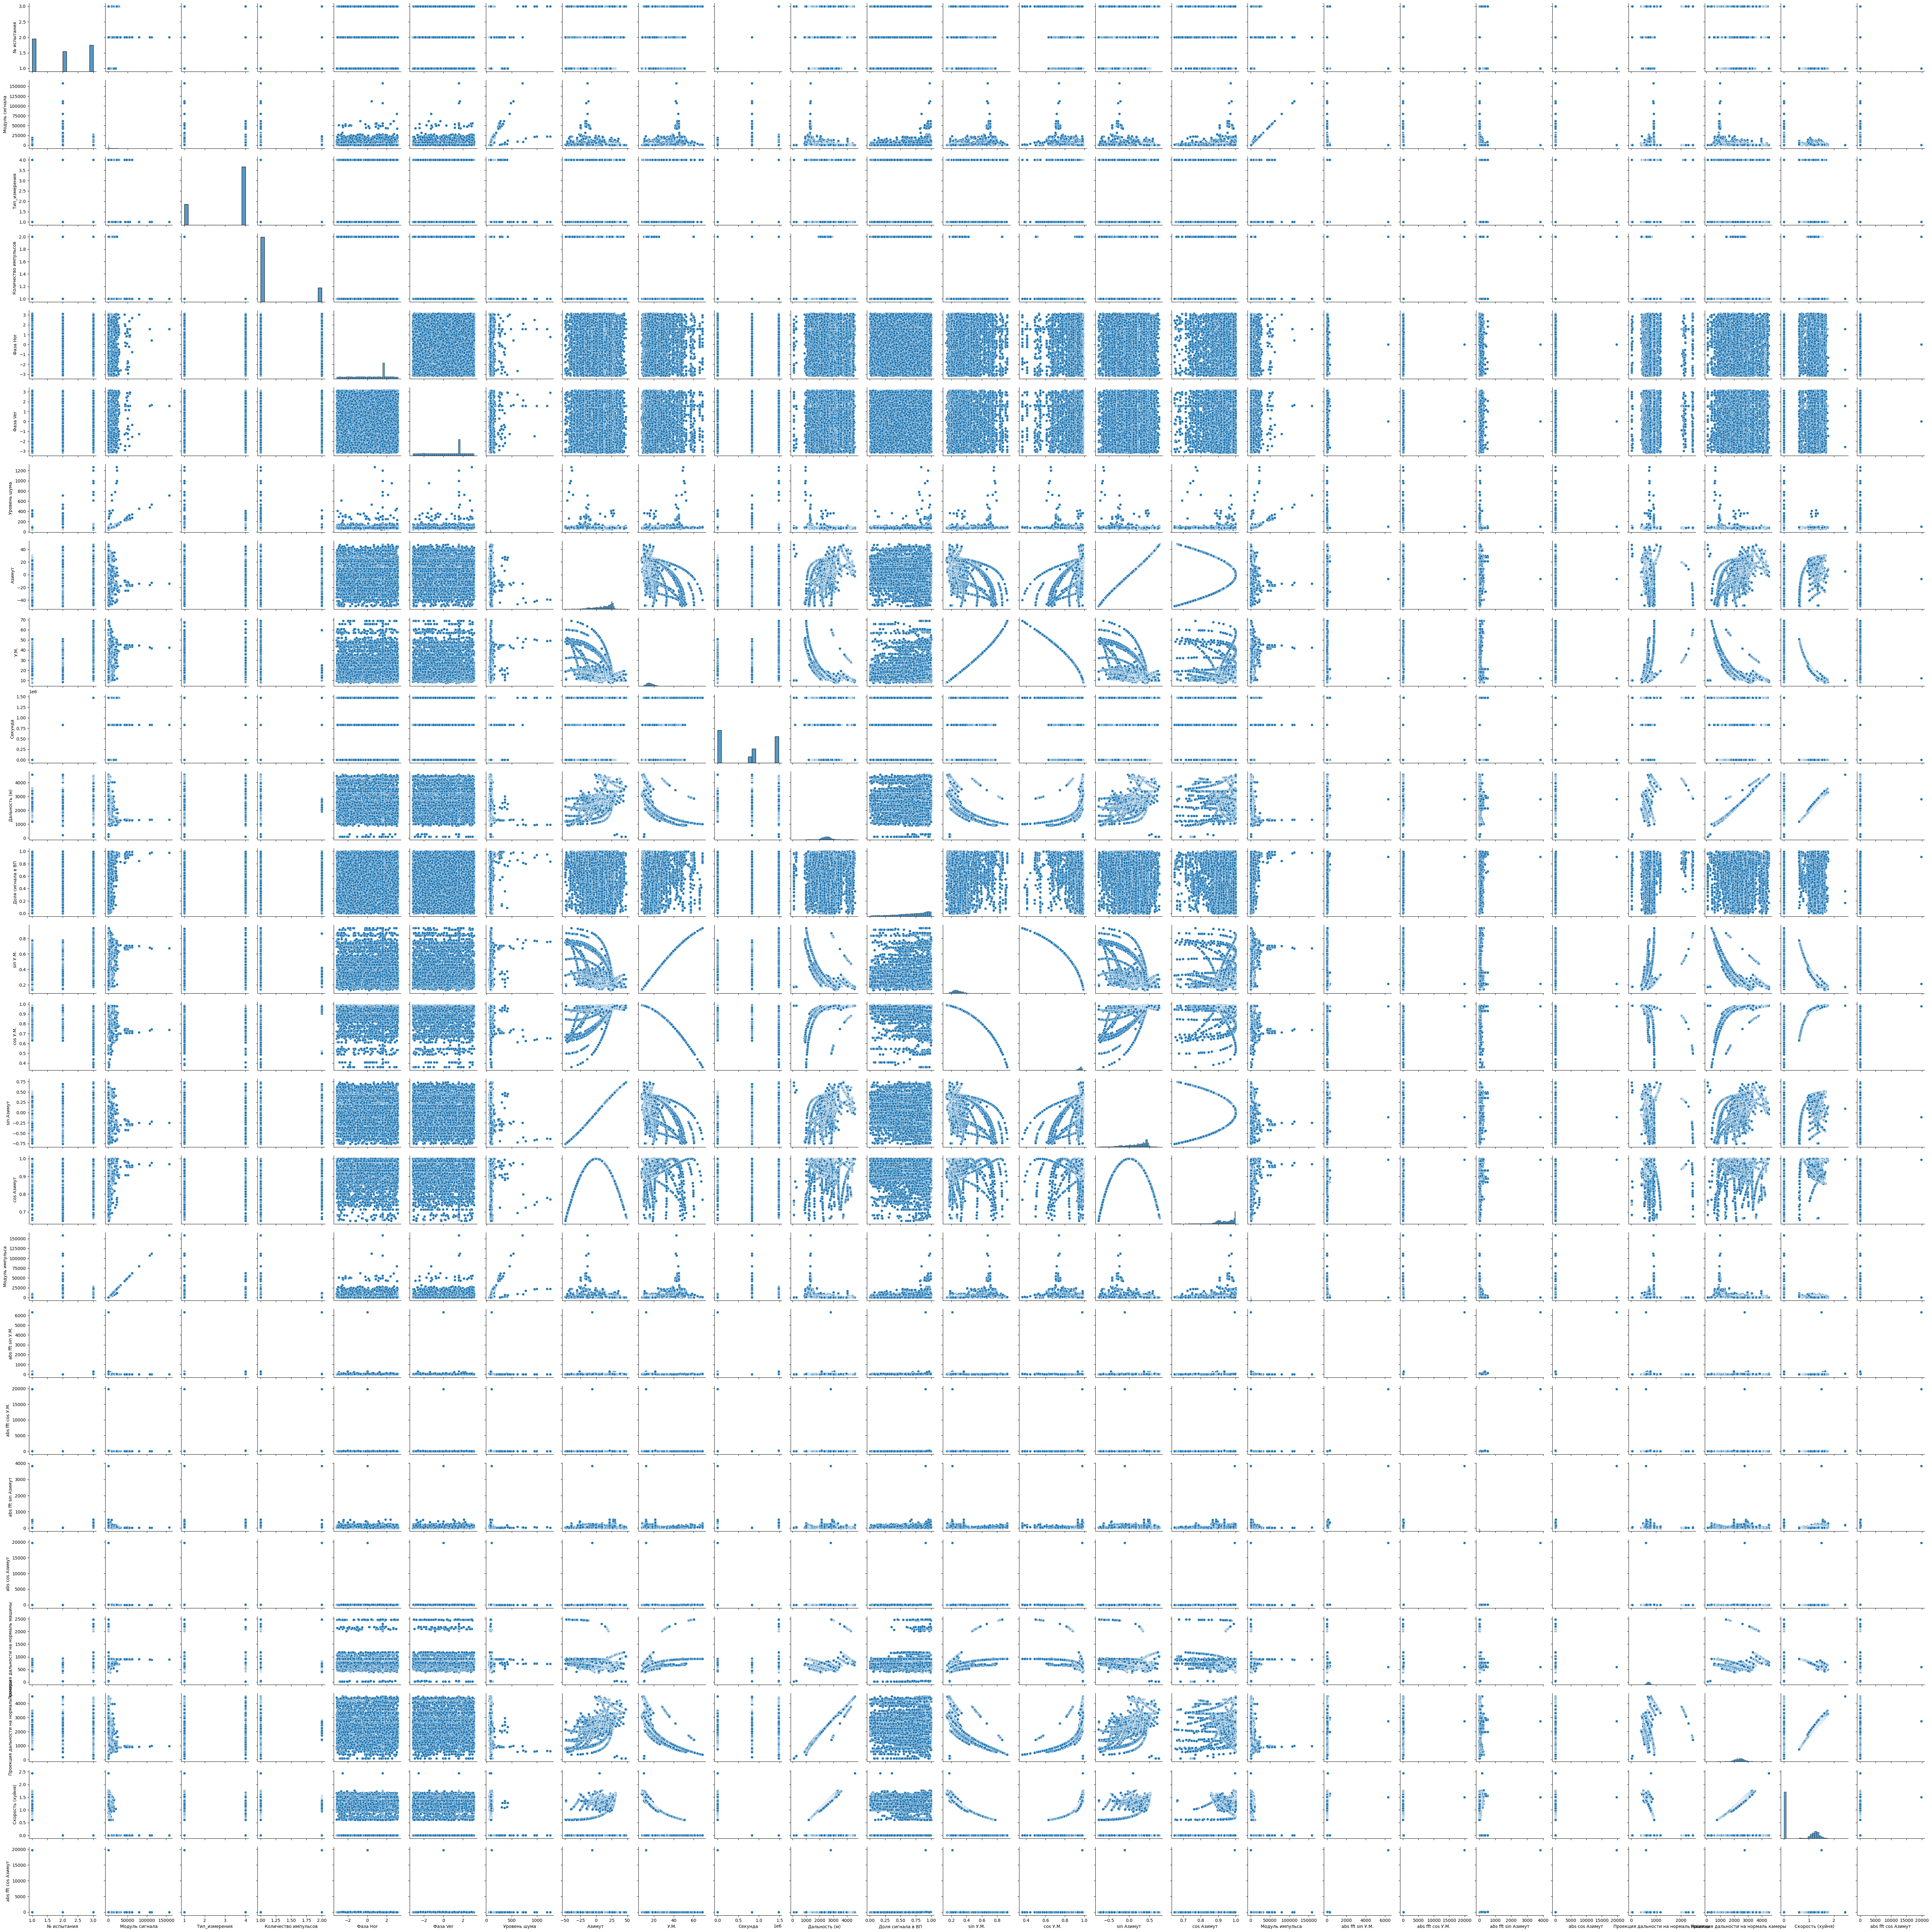

In [70]:
sns.pairplot(data[data.columns[:17].tolist() + data.columns[21:].tolist()]).figure.savefig("output.png")

# Model training

In [134]:
train_data, eval_data, train_label, eval_labels = train_test_split(data.drop(columns = ['Доля сигнала в ВП'] + drop_features),
    data['Доля сигнала в ВП'].to_list(), test_size = 0.2)

In [135]:
cb = CatBoostRegressor(
                       eval_metric = 'R2', 
                       use_best_model = True
                      )

In [136]:
cb.fit(
    train_data,
    train_label,
    #cat_features = cat_features,
    eval_set = (eval_data,eval_labels)
)

/Users/len/anaconda3/envs/py_projects/lib/python3.10/site-packages/catboost/core.py:1419: ComplexWarning: Casting complex values to real discards the imaginary part
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.079279
0:	learn: 0.0160437	test: 0.0143221	best: 0.0143221 (0)	total: 6.46ms	remaining: 6.46s
1:	learn: 0.0287910	test: 0.0263325	best: 0.0263325 (1)	total: 9.46ms	remaining: 4.72s
2:	learn: 0.0413065	test: 0.0369829	best: 0.0369829 (2)	total: 11.2ms	remaining: 3.71s
3:	learn: 0.0527945	test: 0.0469584	best: 0.0469584 (3)	total: 12.9ms	remaining: 3.21s
4:	learn: 0.0635609	test: 0.0558019	best: 0.0558019 (4)	total: 14.8ms	remaining: 2.95s
5:	learn: 0.0749603	test: 0.0653314	best: 0.0653314 (5)	total: 16.6ms	remaining: 2.76s
6:	learn: 0.0835466	test: 0.0729890	best: 0.0729890 (6)	total: 18.5ms	remaining: 2.63s
7:	learn: 0.0916239	test: 0.0792108	best: 0.0792108 (7)	total: 20.5ms	remaining: 2.54s
8:	learn: 0.0984605	test: 0.0849445	best: 0.0849445 (8)	total: 22.5ms	remaining: 2.48s
9:	learn: 0.1044411	test: 0.0898006	best: 0.0898006 (9)	total: 24.5ms	remaining: 2.42s
10:	learn: 0.1095595	test: 0.0947913	best: 0.0947913 (10)	total: 26.6ms	remaining: 2.39s
11:	learn: 

In [138]:
import matplotlib.pyplot as plt
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [103]:
n_estimators = cb.best_iteration_

In [104]:
cb.get_params()

{'loss_function': 'RMSE', 'use_best_model': True, 'eval_metric': 'R2'}

In [130]:
cb.learning_rate_

0.07927899807691574

In [140]:
best_cb = CatBoostRegressor(#cat_features = cat_features,
    iterations = n_estimators, learning_rate = cb.learning_rate_,
 loss_function =  'RMSE',
 #use_best_model = True,
 eval_metric ='R2' )

In [141]:
best_cb.fit(data.drop(columns = ['Доля сигнала в ВП'] + drop_features),
    data['Доля сигнала в ВП'])
    #cat_features = cat_features)

/Users/len/anaconda3/envs/py_projects/lib/python3.10/site-packages/catboost/core.py:1419: ComplexWarning: Casting complex values to real discards the imaginary part
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.0155140	total: 4.89ms	remaining: 4.88s
1:	learn: 0.0273618	total: 7.87ms	remaining: 3.92s
2:	learn: 0.0402565	total: 10.6ms	remaining: 3.51s
3:	learn: 0.0510586	total: 13.2ms	remaining: 3.28s
4:	learn: 0.0627616	total: 15.7ms	remaining: 3.13s
5:	learn: 0.0721373	total: 18.2ms	remaining: 3.01s
6:	learn: 0.0810199	total: 21ms	remaining: 2.98s
7:	learn: 0.0874728	total: 23.3ms	remaining: 2.88s
8:	learn: 0.0947719	total: 25.2ms	remaining: 2.77s
9:	learn: 0.1013829	total: 27.4ms	remaining: 2.71s
10:	learn: 0.1064895	total: 29.3ms	remaining: 2.63s
11:	learn: 0.1122796	total: 31.5ms	remaining: 2.59s
12:	learn: 0.1179474	total: 33.4ms	remaining: 2.53s
13:	learn: 0.1223137	total: 35.2ms	remaining: 2.48s
14:	learn: 0.1253569	total: 38.3ms	remaining: 2.51s
15:	learn: 0.1315957	total: 40.5ms	remaining: 2.49s
16:	learn: 0.1358317	total: 42.5ms	remaining: 2.46s
17:	learn: 0.1410831	total: 45.1ms	remaining: 2.46s
18:	learn: 0.1435822	total: 47.1ms	remaining: 2.43s
19:	learn: 0.1457591	tot

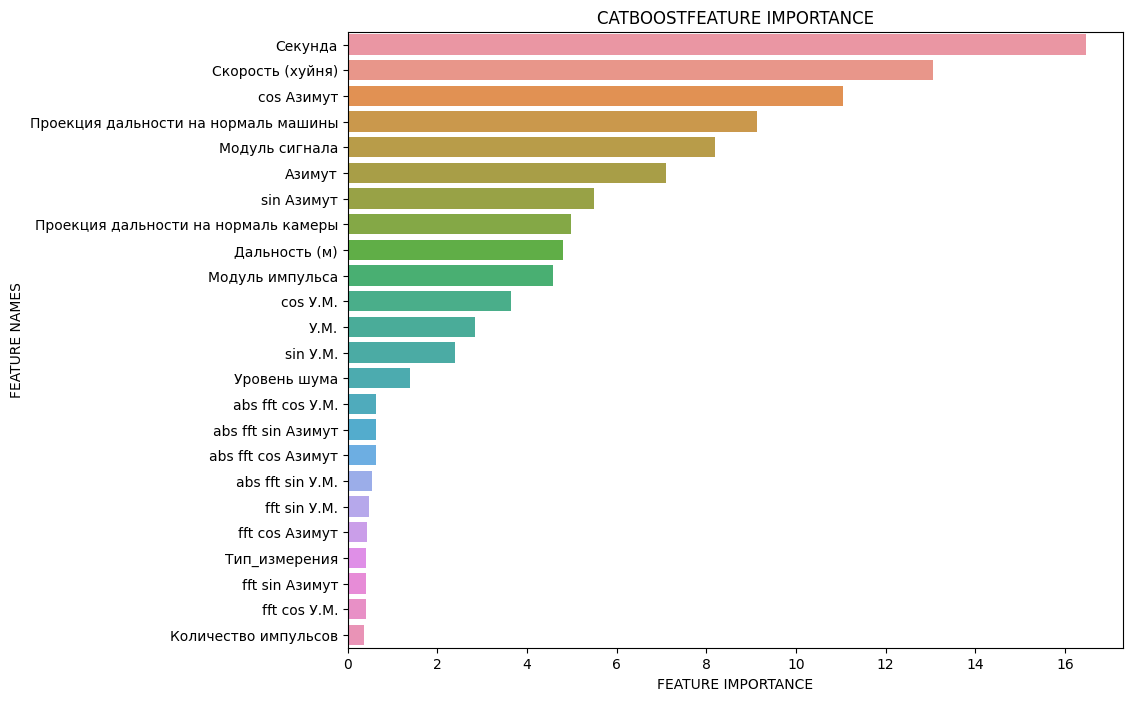

In [143]:
plot_feature_importance(best_cb.get_feature_importance(),data.drop(columns = ['Доля сигнала в ВП'] + drop_features).columns,'CATBOOST')

In [144]:
test_data = pd.read_csv('mars-public_test-regr.csv')

In [145]:
for radian_feature in radian_features:
    test_data[f'sin {radian_feature}'] = np.sin(test_data[radian_feature])
    test_data[f'cos {radian_feature}'] = np.cos(test_data[radian_feature])

In [146]:
test_data['Модуль импульса'] = test_data['Модуль сигнала'] / test_data['Количество импульсов']

In [147]:
test_data['fft sin У.М.'] = scipy.fft.fft(np.array(test_data['sin У.М.'].tolist()))
test_data['fft cos У.М.'] = scipy.fft.fft(np.array(test_data['cos У.М.'].tolist()))
test_data['fft sin Азимут'] = scipy.fft.fft(np.array(test_data['sin Азимут'].tolist()))
test_data['fft cos Азимут'] = scipy.fft.fft(np.array(test_data['cos Азимут'].tolist()))

In [148]:
test_data['abs fft sin У.М.'] = np.abs(test_data['fft sin У.М.'])
test_data['abs fft cos У.М.'] = np.abs(test_data['fft cos У.М.'])
test_data['abs fft sin Азимут'] = np.abs(test_data['fft sin Азимут'])
test_data['abs fft cos Азимут'] = np.abs(test_data['fft cos Азимут'])

In [149]:
test_data['Проекция дальности на нормаль машины'] = test_data['Дальность (м)'] * test_data['sin У.М.']
test_data['Проекция дальности на нормаль камеры'] = test_data['Дальность (м)'] * test_data['cos У.М.']

In [150]:
test_data['Скорость (хуйня)'] = test_data['Дальность (м)'] / test_data['Секунда']

In [151]:
preds = best_cb.predict(test_data)

/Users/len/anaconda3/envs/py_projects/lib/python3.10/site-packages/catboost/core.py:1419: ComplexWarning: Casting complex values to real discards the imaginary part
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [153]:
test_data['Доля сигнала в ВП'] = preds

In [154]:
test_data[['№ испытания', 'Модуль сигнала', 'Тип_измерения',
       'Количество импульсов', 'Фаза Hor', 'Фаза Ver', 'Уровень шума',
       'Азимут', 'У.М.', 'Секунда', 'Дальность (м)', 
          'Доля сигнала в ВП']].to_csv('first_submission.csv', index = False)

In [155]:
test_data

№ испытания  Модуль сигнала  Тип_измерения  Количество импульсов  \
0               1         2228.58              1                     2   
1               1         1886.45              1                     2   
2               1         2015.85              1                     2   
3               1        11495.21              1                     2   
4               1         1595.66              1                     2   
...           ...             ...            ...                   ...   
4485            3         1127.39              4                     1   
4486            3         1015.29              4                     1   
4487            3         1066.67              4                     1   
4488            3         1003.16              4                     1   
4489            3         1051.81              4                     1   

      Фаза Hor  Фаза Ver  Уровень шума     Азимут       У.М.       Секунда  \
0    -1.296037 -0.823444     95.340461   8.576654  12.988322  1.874687e+03   
1     1.570796  1.570796     96.199134  26.927104  13.798552  1.874785e+03   
2     1.570796  1.570796     87.818645   8.393800  12.966248  1.874883e+03   
3     1.570796  1.570796     71.244075  28.437188  13.875287  1.874953e+03   
4     1.570796  1.570796     82.509944   8.252281  12.861609  1.875092e+03   
...        ...       ...           ...        ...        ...           ...   
4485 -2.532464 -2.161597     80.449525 -39.347686  68.876576  1.476153e+06   
4486  1.022957  1.786013     85.928771 -39.362483  68.878026  1.476153e+06   
4487 -1.177634 -0.582136     80.725173 -39.377443  68.879453  1.476153e+06   
4488  2.069521  2.681160     80.661715 -39.392247  68.880902  1.476153e+06   
4489  1.378928  1.867314     77.127869 -39.407054  68.882349  1.476153e+06   

      Дальность (м)  sin У.М.  cos У.М.  sin Азимут  cos Азимут  \
0       2789.785685  0.409542  0.912291    0.750041   -0.661392   
1       2734.624786  0.943216  0.332181    0.975113   -0.221709   
2       2785.661124  0.389305  0.921109    0.857802   -0.513980   
3       2706.620650  0.965905  0.258897   -0.162135   -0.986769   
4       2781.097562  0.290968  0.956733    0.921722   -0.387852   
...             ...       ...       ...         ...         ...   
4485     990.507201 -0.236209  0.971702   -0.996977   -0.077699   
4486     990.507201 -0.234800  0.972044   -0.995718   -0.092442   
4487     990.496991 -0.233412  0.972378   -0.994224   -0.107328   
4488     990.486782 -0.232003  0.972715   -0.992526   -0.122034   
4489     990.476573 -0.230595  0.973050   -0.990610   -0.136717   

      Модуль импульса           fft sin У.М.           fft cos У.М.  \
0            1114.290  92.3081700-0.0000000j  -115.442349-0.000000j   
1             943.225  30.674715-115.196547j -236.742008-18.059990j   
2            1007.925  9.211085+042.7531980j   29.447093-85.605245j   
3            5747.605  150.977417+52.709429j  48.911410+100.610529j   
4             797.830  -1.3943600+4.0990320j  4.935677-037.0133380j   
...               ...                    ...                    ...   
4485         1127.390   19.975738-45.350284j   47.247026+17.789566j   
4486         1015.290  -1.3943600-4.0990320j  4.935677+037.0133380j   
4487         1066.670  150.977417-52.709429j  48.911410-100.610529j   
4488         1003.160  9.211085-042.7531980j   29.447093+85.605245j   
4489         1051.810  30.674715+115.196547j -236.742008+18.059990j   

             fft sin Азимут        fft cos Азимут  abs fft sin У.М.  \
0      311.137835-0.000000j  223.826326-0.000000j         92.308170   
1    -101.140037-20.257902j  82.820898+19.363553j        119.210665   
2     -78.414299-68.320204j   52.520731+0.972600j         43.734198   
3    -8.851196+065.2996210j   1.725357-37.925792j        159.913928   
4      57.289809-66.708738j -82.227279+60.329543j          4.329701   
...                     ...                   ...               ...   
4485 -9.094404+088.141032